### Crop Disease Prediction
This model predicts which crop has what type of disease with the help of dataset available on kaggle.

In [38]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

C:\Users\mohit\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\client\session.py:1766: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
os.chdir('C:/Users/mohit/Downloads/Compressed/archive_6')
directory = os.getcwd()
directory

'C:\\Users\\mohit\\Downloads\\Compressed\\archive_6'

In [14]:
train_data = os.path.join('train/')
val_data = os.path.join('valid/')
test_data = os.path.join('test/test')
new_data =  os.path.join('new/')
file = os.listdir(train_data)
print(file[:])

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',

### Tranfer Learning

In [4]:
mod = tf.keras.applications.InceptionV3(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

In [5]:
ip = mod.layers[0].input
op = mod.layers[-2].output
op

<KerasTensor: shape=(None, 2048) dtype=float32 (created by layer 'avg_pool')>

In [6]:
final_output=tf.keras.layers.Dense(128)(op)
final_output=tf.keras.layers.Activation('relu')(final_output)
final_output=tf.keras.layers.Dropout(0.2)(final_output)
final_output=tf.keras.layers.Dense(38,activation='softmax')(final_output)

final_output

<KerasTensor: shape=(None, 38) dtype=float32 (created by layer 'dense_1')>

In [7]:
model=tf.keras.Model(inputs =ip,outputs=final_output)

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [9]:
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             optimizer= 'Adam',
             metrics=['accuracy'])

### Augmentation

In [15]:
train_gen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,
    fill_mode='nearest'
)

train_data_gen = train_gen.flow_from_directory(train_data , 
                                              target_size = (299,299),
                                              batch_size=10,
                                              class_mode="categorical")

val_gen = ImageDataGenerator(rescale = 1/255)
val_data_gen = val_gen.flow_from_directory(val_data ,
                                             target_size = (299,299),
                                             batch_size = 10,
                                             class_mode = "categorical")

test_gen = ImageDataGenerator(rescale = 1/255)
test_data_gen = test_gen.flow_from_directory(test_data ,
                                             target_size = (299,299),
                                             batch_size = 10,
                                             class_mode = "categorical")

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
Found 0 images belonging to 0 classes.


In [44]:
categories = list(train_data_gen.class_indices.keys())
print(train_data_gen.class_indices)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [12]:
model_fiting = model.fit(train_data_gen ,steps_per_epoch=1000,epochs=50,validation_data=val_data_gen, verbose=2 ,batch_size =10 )

Epoch 1/50


C:\Users\mohit\anaconda3\envs\tf-gpu\lib\site-packages\keras\backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


1000/1000 - 295s - loss: 3.4242 - accuracy: 0.0703 - val_loss: 3.8372 - val_accuracy: 0.1087
Epoch 2/50
1000/1000 - 283s - loss: 2.6429 - accuracy: 0.2044 - val_loss: 3.7492 - val_accuracy: 0.1621
Epoch 3/50
1000/1000 - 284s - loss: 2.2006 - accuracy: 0.3160 - val_loss: 2.4696 - val_accuracy: 0.2952
Epoch 4/50
1000/1000 - 286s - loss: 1.9703 - accuracy: 0.3646 - val_loss: 1.8807 - val_accuracy: 0.3908
Epoch 5/50
1000/1000 - 284s - loss: 1.7860 - accuracy: 0.4282 - val_loss: 4.0474 - val_accuracy: 0.2447
Epoch 6/50
1000/1000 - 284s - loss: 1.6626 - accuracy: 0.4714 - val_loss: 2.9917 - val_accuracy: 0.3412
Epoch 7/50
1000/1000 - 284s - loss: 1.5422 - accuracy: 0.5090 - val_loss: 1.2389 - val_accuracy: 0.6111
Epoch 8/50
1000/1000 - 284s - loss: 1.3942 - accuracy: 0.5532 - val_loss: 1.1734 - val_accuracy: 0.6139
Epoch 9/50
1000/1000 - 284s - loss: 1.3011 - accuracy: 0.5836 - val_loss: 0.9142 - val_accuracy: 0.6949
Epoch 10/50
1000/1000 - 284s - loss: 1.2393 - accuracy: 0.6075 - val_loss: 

In [13]:
model.save('8966_8960model.h5') # 1000stepepoch , 50epoch , lr=auto

In [14]:
acc = model_fiting.history["accuracy"]
validation_acc = model_fiting.history["val_accuracy"]
print(acc)
print(validation_acc)

[0.07029999792575836, 0.20440000295639038, 0.3160000145435333, 0.3645823001861572, 0.42820000648498535, 0.4714357256889343, 0.5089544653892517, 0.5532000064849854, 0.5835999846458435, 0.6075000166893005, 0.6410999894142151, 0.6626313328742981, 0.6717000007629395, 0.6926000118255615, 0.7006999850273132, 0.7164000272750854, 0.7419999837875366, 0.7444999814033508, 0.7530999779701233, 0.7693846821784973, 0.7831000089645386, 0.7867000102996826, 0.7910000085830688, 0.7977988719940186, 0.8123999834060669, 0.8114057183265686, 0.8228999972343445, 0.824999988079071, 0.8463000059127808, 0.8454999923706055, 0.8486999869346619, 0.8417999744415283, 0.8589000105857849, 0.8633999824523926, 0.8636318445205688, 0.8600999712944031, 0.8682000041007996, 0.8776999711990356, 0.878000020980835, 0.8752999901771545, 0.8773386478424072, 0.88919997215271, 0.8881999850273132, 0.8889999985694885, 0.8936468362808228, 0.8955000042915344, 0.8914999961853027, 0.8952999711036682, 0.8988494277000427, 0.8966000080108643]


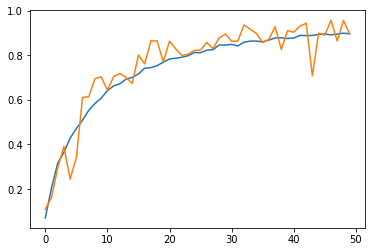

In [15]:
epochs=range(len(acc))
plt.plot(epochs ,acc )
plt.plot(epochs, validation_acc)
plt.show()

In [11]:
model = tf.keras.models.load_model('8966_8960model.h5')

In [12]:
evalu = model.evaluate(val_data_gen)

C:\Users\mohit\anaconda3\envs\tf-gpu\lib\site-packages\keras\backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


1758/1758 [==============================] - 112s 60ms/step - loss: 0.3843 - accuracy: 0.8960


{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [42]:
from tensorflow.keras.utils import load_img , img_to_array
uploading_file = os.listdir('new')

for fn in uploading_file:
  path = "C:/Users/mohit/Downloads/Compressed/archive_6/new/"+fn
  image = load_img(path , target_size=(299,299))
  x = img_to_array(image)
  x = x/225
  x = np.expand_dims(x , axis=0)

  images = np.vstack([x])
  pred_res = model.predict(images , batch_size=10)
  print(pred_res[0].max())
  print(np.argmax(pred_res[0]))
  print(pred_res[0])
  print(fn)

0.48352107
21
[6.9600078e-03 6.0288003e-06 8.7157794e-04 7.2159662e-07 4.0723289e-06
 5.6112101e-05 4.7607209e-08 6.1415289e-05 5.2192931e-08 9.2403432e-05
 2.0532701e-12 1.5605532e-07 4.6564682e-07 1.5791744e-05 4.3478034e-11
 1.0009341e-08 8.1399136e-05 2.1506315e-08 1.9058692e-05 2.9475185e-09
 7.6591922e-03 4.8352107e-01 1.6315863e-04 7.0067008e-10 7.6441156e-09
 1.1487745e-08 2.5838106e-05 5.9200825e-11 2.0136777e-03 2.3835225e-01
 2.4275737e-01 1.6312915e-03 1.2622900e-02 2.4932766e-05 3.0485606e-03
 5.4536149e-06 4.8637844e-06 1.1775775e-07]
0b494c44-8cd0-4491-bdfd-8a354209c3ae___RS_Erly.B 9561.JPG
0.9725921
17
[2.3532348e-07 1.5149839e-04 9.7359247e-05 2.2851940e-02 4.5280575e-04
 1.4891787e-05 3.2748292e-07 1.0647748e-14 7.0937810e-19 9.1549047e-16
 2.1735609e-15 1.6112802e-12 7.5427373e-12 2.8022757e-14 3.8740472e-10
 4.7746516e-07 3.0358015e-03 9.7259212e-01 1.6703947e-06 3.5117345e-04
 3.1252865e-15 2.0698012e-08 1.6773836e-06 7.2618898e-09 1.0431174e-06
 1.5300141e-12 2.23

#### for Flask operation

In [40]:
from tensorflow.keras.utils import load_img , img_to_array
path = "C:/Users/mohit/Downloads/Compressed/archive_6/new/AppleCedarRust2.JPG"
image = load_img(path , target_size=(299,299))
x = img_to_array(image)
x = x.reshape(1,299,299,3)
x = x/255
res = model.predict(x)

In [45]:
np.argmax(res[0])

2